# Epidemic model SIR 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numba
from scipy import integrate
%matplotlib notebook

The so-called SIR model describes the spread of a disease in a population fixed to $N$ individuals over time $t$.

## Problem description

The population of $N$ individuals is divided into three categories (compartments) :

	
- individuals $S$ susceptible to be infected;
- individuals $I$ infected;
- recovered from the disease individuals $R$ (and now have acquired immunity to it); 

where $S$, $I$ and $R$ are functions of $t$.

The SIR model, like many others compartmentals models in epidemiology depends on particular parameters that we introduce now : 

- $\beta>0$ the rate of contraction of the disease (transmission parameter)
- $\gamma>0$ : mean recovery rate

Individual $S$ becomes infected after positive contact with an $I$ individual. However, he develops immunity to the disease : he leaves $I$ compartment at a $\gamma$ cure rate.


## Model functioning

The model is based on the following assumptions : 

1. On average, an individual $S$ in the population encounters $\beta$ individuals per unit time

2. The rate of infected individuals leaving compartment $I$ is $\gamma I$ per unit time (once an individual has been infected, he develops immunity to the disease).

3. The population size $N = S + I + R$ is constant.

This is the system of equations of the model : 

$$\left\{ \begin{array}{ll}
\displaystyle \frac{\mathrm{d}S}{\mathrm{d}t} &= -\displaystyle \frac{\beta S}{N} I,\\[4mm]
\displaystyle \frac{\mathrm{d}I}{\mathrm{d}t} &= \displaystyle \frac{\beta S}{N} I - \gamma I,\\[4mm]
\displaystyle\frac{\mathrm{d}R}{\mathrm{d}t} &= \displaystyle \gamma I.
\end{array} \right.$$

Some remarks on the model : 

- The average infection period (i.e. the mean period during which an infected invidual can pass it on) is equal to $\displaystyle \frac{1}{\gamma}$.

- It's a deterministic model


- The assumption of a constant average number of contacts $\beta$ is a strong and constraining assumption : it cannot be applied to all diseases. 


- We can imagine improving this model by taking into account for example :

    - newborns that would correspond to $S$ susceptible individuals. We would introduce a birth rate $b$.
       
    - the deceased who would leave the compartments $S$ or $I$ with the same rate $b$ : this allows to consider a constant population $N$. 

Further reading on the SIR model here :
    https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model
    

## Model diagram

The diagram below sums up the model SIR that we studied.

![](https://upload.wikimedia.org/wikipedia/commons/3/30/Diagram_of_SIR_epidemic_model_states_and_transition_rates.svg)


[Source: Wikipedia](https://upload.wikimedia.org/wikipedia/commons/3/30/Diagram_of_SIR_epidemic_model_states_and_transition_rates.svg)

## Problem formulation

We pose 

$$
X = \begin{pmatrix} S \\
I \\
R \end{pmatrix}
$$


And we write our differential system so:  

$$
\dot{X} = 
\begin{pmatrix} \displaystyle -\frac{\beta S}{N} I\\ 
\displaystyle \frac{\beta S}{N} I - \gamma I \\
\gamma I 
\end{pmatrix} 
= f\left(X\right)
$$

## Settings

In [38]:
N = 350. #Total number of individuals, N
I0, R0 = 1., 0 #Initial number of infected and recovered individuals
S0 = N - I0 - R0 #Susceptible individuals to infection initially is deduced
beta, gamma = 0.4, 0.1 #Contact rate and mean recovery rate
tmax = 160 #A grid of time points (in days)
Nt = 160
t = np.linspace(0, tmax, Nt+1)

In [39]:
def derivative(X, t):
    S, I, R = X
    dotS = -beta * S * I / N
    dotI = beta * S * I / N - gamma * I
    dotR = gamma * I
    return np.array([dotS, dotI, dotR])

In [40]:
X0 = S0, I0, R0 #Initial conditions vector
res = integrate.odeint(derivative, X0, t)
S, I, R = res.T
Seuil = 1 - 1 / (beta/gamma)
Seuil

0.75

<IPython.core.display.Javascript object>


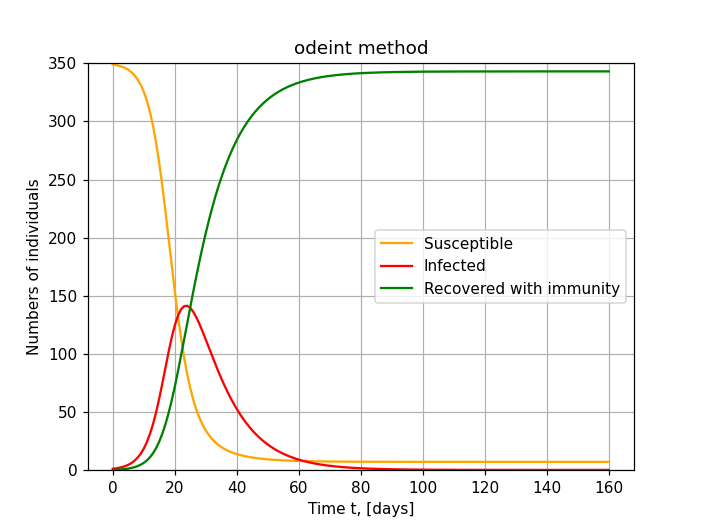

In [41]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, S, 'orange', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered with immunity')
plt.xlabel('Time t, [days]')
plt.ylabel('Numbers of individuals')
plt.ylim([0,N])
plt.legend()

plt.show();

## Euler approach

In [6]:
def Euler(func, X0, t):
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1): 
        X[i+1] = X[i] + func(X[i], t[i]) * dt
    return X

In [7]:
Nt = 100
Xe = Euler(derivative, X0, t)

<IPython.core.display.Javascript object>


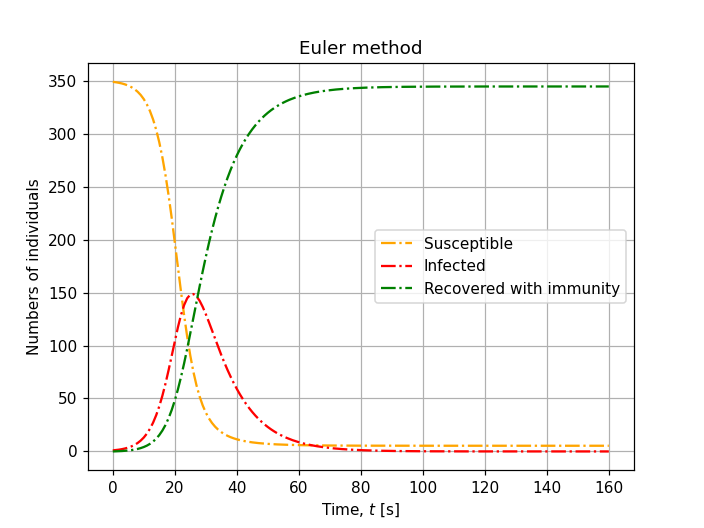

In [8]:
plt.figure()

plt.title("Euler method")
plt.plot(t, Xe[:,0], color = 'orange', linestyle = '-.', label='Susceptible')
plt.plot(t, Xe[:,1], 'r-.', label='Infected')
plt.plot(t, Xe[:,2], 'g-.', label='Recovered with immunity')
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Numbers of individuals")
plt.legend(loc = "best")

plt.show();

## Comparing of both approaches

<IPython.core.display.Javascript object>


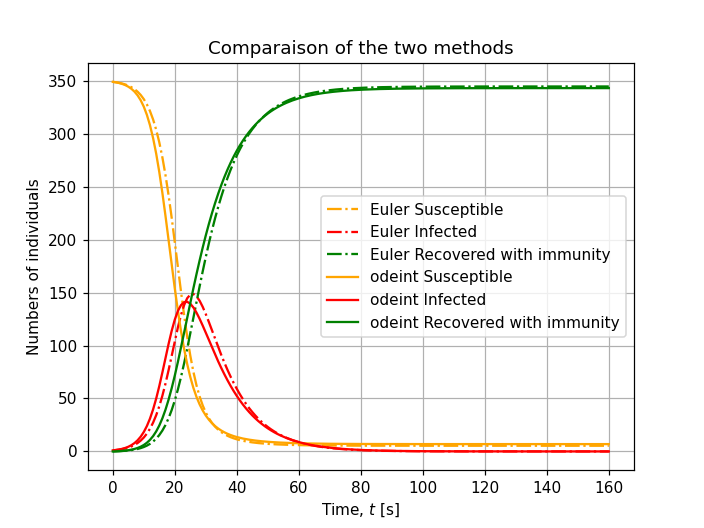

In [9]:
plt.figure()

plt.plot(t, Xe[:,0], color = 'orange', linestyle = '-.', label='Euler Susceptible')
plt.plot(t, Xe[:,1], 'r-.', label='Euler Infected')
plt.plot(t, Xe[:,2], 'g-.', label='Euler Recovered with immunity')
plt.plot(t, S, 'orange', label='odeint Susceptible')
plt.plot(t, I, 'r', label='odeint Infected')
plt.plot(t, R, 'g', label='odeint Recovered with immunity')
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Numbers of individuals")
plt.legend(loc = "best")
plt.title("Comparaison of the two methods")
plt.show();

## What is $R_0$ ? 

$R_0$ is a parameter describing the average number of new infections due to a sick individual. 
It's commonly called *the basic reproduction number*. It's a fundamental concept in epidemiology.

If $R_0 > 1$ the epidemic will persist otherwise it will die out.

If a disease has an $R_0 = 3$ for example, so on average, a person who has this sickness will pass it on to three other people.

See for more details : https://en.wikipedia.org/wiki/Basic_reproduction_number

In [10]:
import ipywidgets as ipw

<IPython.core.display.Javascript object>


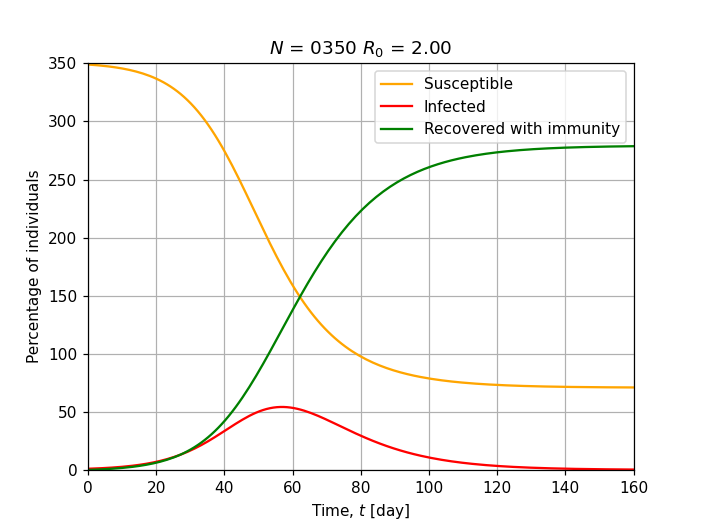

interactive(children=(FloatSlider(value=0.2, description='beta', max=1.0, step=0.01), FloatSlider(value=0.1, d…

In [11]:
def deriv(X, t, beta, gamma):
    S, I, R = X
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return np.array([dSdt, dIdt, dRdt])

def update(beta = 0.2, gamma = 0.1): #beta = 0.3, gamma = 0.06 -> R0 = 5
    """
    Update function.
    """
    I0, R0 = 1, 0
    S0 = N - I0 - R0
    X0 = S0, I0, R0
    
    sol = integrate.odeint(deriv, X0, t, args = (beta, gamma))
    line0.set_ydata(sol[:, 0])
    line1.set_ydata(sol[:, 1])
    line2.set_ydata(sol[:, 2])
    
    txR0 = beta/gamma
    ax.set_title("$N$ = {0} $R_0$ = {1:.2f}".format(str(N).zfill(4), txR0))
    
Nt = 160
t = np.linspace(0., tmax, Nt)
X = np.zeros((Nt,3))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()
line0, = ax.plot(t, X[:,0], "orange", label = "Susceptible")
line1, = ax.plot(t, X[:,1], "r", label = 'Infected')
line2, = ax.plot(t, X[:,2], "g", label = 'Recovered with immunity')
ax.set_xlim(0., tmax, Nt)
ax.set_ylim(0., N, Nt)
ax.set_xlabel("Time, $t$ [day]")
ax.set_ylabel("Percentage of individuals")
plt.legend()

ipw.interact(update, beta = (0.,1., 0.01), 
           gamma = (0.01, 1., 0.01));